In [1]:
using DataFrames, DataFramesMeta, Statistics, StatsPlots, Plots, GLM

In [2]:
aq = [10.0	8.04	10.0	9.14	10.0	7.46	8.0	6.58
8.0	6.95	8.0	8.14	8.0	6.77	8.0	5.76
13.0	7.58	13.0	8.74	13.0	12.74	8.0	7.71
9.0	8.81	9.0	8.77	9.0	7.11	8.0	8.84
11.0	8.33	11.0	9.26	11.0	7.81	8.0	8.47
14.0	9.96	14.0	8.10	14.0	8.84	8.0	7.04
6.0	7.24	6.0	6.13	6.0	6.08	8.0	5.25
4.0	4.26	4.0	3.10	4.0	5.39	19.0	12.50
12.0	10.84	12.0	9.13	12.0	8.15	8.0	5.56
7.0	4.82	7.0	7.26	7.0	6.42	8.0	7.91
5.0	5.68	5.0	4.74	5.0	5.73	8.0	6.89
]

11×8 Array{Float64,2}:
 10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
  8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
 13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
  9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
 11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
 14.0   9.96  14.0  8.1   14.0   8.84   8.0   7.04
  6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
  4.0   4.26   4.0  3.1    4.0   5.39  19.0  12.5
 12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
  7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
  5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89

In [3]:
df = DataFrame(aq)

,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.1,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.1,4.0,5.39,19.0,12.5
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [4]:
newnames = vec(string.(["x", "y"],  [1 2 3 4]))   # vec is flattening the matrix

8-element Array{String,1}:
 "x1"
 "y1"
 "x2"
 "y2"
 "x3"
 "y3"
 "x4"
 "y4"

In [5]:
rename!(df, newnames)    # ! is convention for function operating inplace

,x1,y1,x2,y2,x3,y3,x4,y4
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.1,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.1,4.0,5.39,19.0,12.5
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [6]:
#select!(df, r"x", :)    # get columns in order based on Regex

In [7]:
mean(df.y2)

7.500909090909091

In [15]:
describe(df, :mean=> mean, :std=>std)

,variable,mean,std
,Symbol,Float64,Float64
1,x1,9.0,3.31662
2,x2,9.0,3.31662
3,x3,9.0,3.31662
4,x4,9.0,3.31662
5,y1,7.50091,2.03157
6,y2,7.50091,2.03166
7,y3,7.5,2.03042
8,y4,7.50091,2.03058


In [53]:
df[:, :id] = 1:nrow(df)

1:11

In [54]:
select(df, "id", :)

,id,x1,x2,x3,x4,y1,y2,y3,y4
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,10.0,10.0,10.0,8.0,8.04,9.14,7.46,6.58
2,2,8.0,8.0,8.0,8.0,6.95,8.14,6.77,5.76
3,3,13.0,13.0,13.0,8.0,7.58,8.74,12.74,7.71
4,4,9.0,9.0,9.0,8.0,8.81,8.77,7.11,8.84
5,5,11.0,11.0,11.0,8.0,8.33,9.26,7.81,8.47
6,6,14.0,14.0,14.0,8.0,9.96,8.1,8.84,7.04
7,7,6.0,6.0,6.0,8.0,7.24,6.13,6.08,5.25
8,8,4.0,4.0,4.0,19.0,4.26,3.1,5.39,12.5
9,9,12.0,12.0,12.0,8.0,10.84,9.13,8.15,5.56


In [55]:
Matrix(df)  # Note that id was cast to float

11×9 Array{Float64,2}:
 10.0  10.0  10.0   8.0   8.04  9.14   7.46   6.58   1.0
  8.0   8.0   8.0   8.0   6.95  8.14   6.77   5.76   2.0
 13.0  13.0  13.0   8.0   7.58  8.74  12.74   7.71   3.0
  9.0   9.0   9.0   8.0   8.81  8.77   7.11   8.84   4.0
 11.0  11.0  11.0   8.0   8.33  9.26   7.81   8.47   5.0
 14.0  14.0  14.0   8.0   9.96  8.1    8.84   7.04   6.0
  6.0   6.0   6.0   8.0   7.24  6.13   6.08   5.25   7.0
  4.0   4.0   4.0  19.0   4.26  3.1    5.39  12.5    8.0
 12.0  12.0  12.0   8.0  10.84  9.13   8.15   5.56   9.0
  7.0   7.0   7.0   8.0   4.82  7.26   6.42   7.91  10.0
  5.0   5.0   5.0   8.0   5.68  4.74   5.73   6.89  11.0

In [14]:
# extrema gives 

xlim = collect(extrema(Matrix(select(df, r"x"))))

2-element Array{Float64,1}:
  4.0
 19.0

In [15]:
df

,x1,y1,x2,y2,x3,y3,x4,y4
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.1,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.1,4.0,5.39,19.0,12.5
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [16]:
df.x2

11-element Array{Float64,1}:
 10.0
  8.0
 13.0
  9.0
 11.0
 14.0
  6.0
  4.0
 12.0
  7.0
  5.0

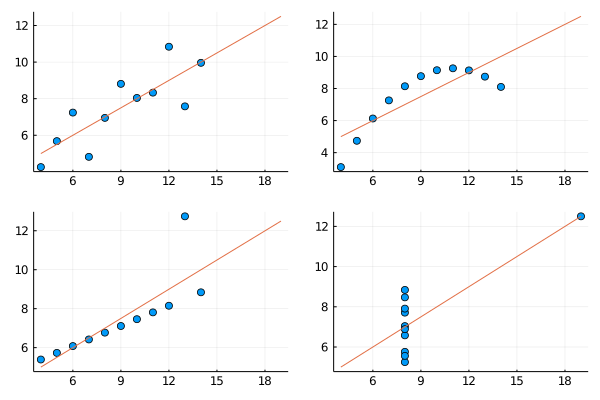

In [18]:
p = plot(layout=4, legend=false)

for i in 1:4
    x = Symbol("x", i)
    y = Symbol("y", i)
    model = lm(term(y) ~ term(x), df)
    scatter!(p, df[:, x], df[:, y], subplot=i)
    plot!(xlim, predict(model, DataFrame(x => xlim)), subplot=i)
end

p

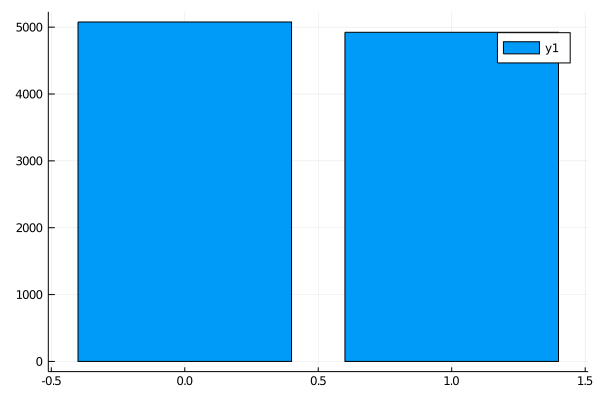

In [167]:
using StatsBase, Plots
d = countmap(rand(0:1, 10_000))
bar(collect(keys(d)), collect(values(d)))

In [166]:
import Pkg
Pkg.add("StatsBase")

   Updating registry at `/opt/julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `/opt/julia/environments/v1.4/Project.toml`
  [2913bbd2] + StatsBase v0.33.0
   Updating `/opt/julia/environments/v1.4/Manifest.toml`
 [no changes]


In [168]:
d

Dict{Int64,Int64} with 2 entries:
  0 => 5077
  1 => 4923

In [170]:
collect(keys(d))

2-element Array{Int64,1}:
 0
 1

In [172]:
collet(values(d))

UndefVarError: UndefVarError: collet not defined

In [173]:
?countmap

search: countmap



```
countmap(x; alg = :auto)
```

Return a dictionary mapping each unique value in `x` to its number of occurrences.

  * `:auto` (default): if `StatsBase.radixsort_safe(eltype(x)) == true` then use                    `:radixsort`, otherwise use `:dict`.
  * `:radixsort`:      if `radixsort_safe(eltype(x)) == true` then use the                    [radix sort](https://en.wikipedia.org/wiki/Radix_sort)                    algorithm to sort the input vector which will generally lead to                    shorter running time. However the radix sort algorithm creates a                    copy of the input vector and hence uses more RAM. Choose `:dict`                    if the amount of available RAM is a limitation.
  * `:dict`:           use `Dict`-based method which is generally slower but uses less                    RAM and is safe for any data type.


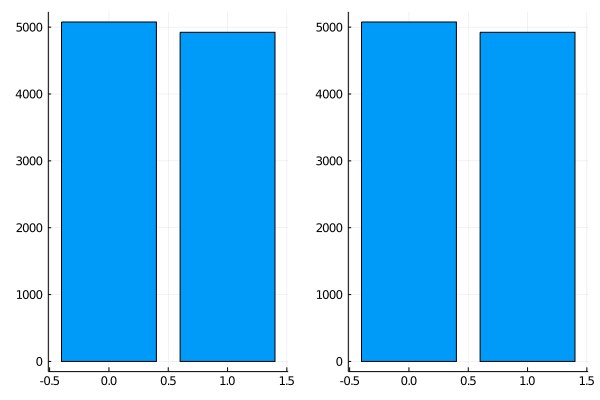

In [178]:
plot(bar(d), bar(d), layout=2)

In [175]:
Plots.default(legend=false)

In [22]:
using DataFrames, GLM

df = DataFrame(x1=[1,2,3], y1=[2,4,7])
x = Symbol("x", 1)
y = Symbol("y", 1)
model = lm(term(y) ~ term(x), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

y1 ~ 1 + x1

Coefficients:
────────────────────────────────────────────────────────────────────────────
              Estimate  Std. Error   t value  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.666667    0.62361   -1.06904    0.4788   -8.59038    7.25704
x1            2.5         0.288675   8.66025    0.0732   -1.16797    6.16797
────────────────────────────────────────────────────────────────────────────

In [23]:
using DataFrames, GLM

df = DataFrame(x1=[1,2,3], y1=[2,4,7])
model = lm(term(Symbol("y", 1)) ~ term(Symbol("x", 1)), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

y1 ~ 1 + x1

Coefficients:
────────────────────────────────────────────────────────────────────────────
              Estimate  Std. Error   t value  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.666667    0.62361   -1.06904    0.4788   -8.59038    7.25704
x1            2.5         0.288675   8.66025    0.0732   -1.16797    6.16797
────────────────────────────────────────────────────────────────────────────

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

y1 ~ 1 + x1

Coefficients:
────────────────────────────────────────────────────────────────────────────
              Estimate  Std. Error   t value  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.666667    0.62361   -1.06904    0.4788   -8.59038    7.25704
x1            2.5         0.288675   8.66025    0.0732   -1.16797    6.16797
────────────────────────────────────────────────────────────────────────────

In [189]:
data

,x1,y1
,Int64,Int64
1,1,2
2,2,4
3,3,7


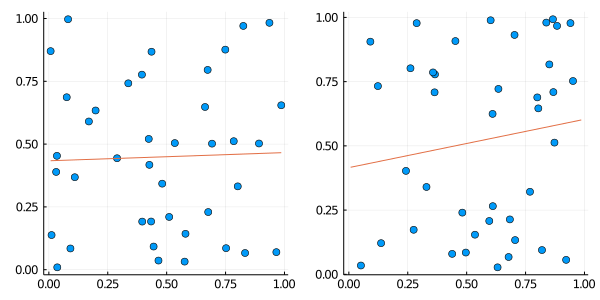

In [26]:
using DataFrames, GLM, Plots

M = rand(40, 4)
df = DataFrame(M)
newnames = vec(string.(["x", "y"],  [1 2]))
rename!(df, newnames)
xlim = collect(extrema(Matrix(select(df, r"x"))))

p = plot(layout=2, legend=false, size=(600, 300))

for i in 1:2
    model = lm(term(Symbol("y", i)) ~ term(Symbol("x", i)), df)
    scatter!(p, df[:, Symbol("x", i)], df[:, Symbol("y", i)], subplot=i)
    plot!(xlim, predict(model, DataFrame(Symbol("x", i) => xlim)), subplot=i)
end

p

In [11]:
df[:, Symbol("x", 1)]

20-element Array{Float64,1}:
 0.5871526078303535
 0.13312482588337016
 0.9065482912669676
 0.6989864119268148
 0.7367350391852059
 0.5508050733854228
 0.16793006129414056
 0.44346706040883843
 0.947086994161954
 0.950880824610455
 0.6761359471403598
 0.6213083927798071
 0.9890578443700964
 0.06800239838199884
 0.4777173264997405
 0.9541549270567371
 0.10789472863561222
 0.12684297364670782
 0.7126668927936195
 0.47555404621007336

In [7]:
newnames = vec(string.(["x", "y"],  [1 2]))

4-element Array{String,1}:
 "x1"
 "y1"
 "x2"
 "y2"

,x1,x2,y1,y2
,Float64,Float64,Float64,Float64
1,0.264102,0.0726269,0.598832,0.462976
2,0.999097,0.608566,0.303104,0.85336
3,0.0691684,0.334289,0.487088,0.907533
4,0.995307,0.212043,0.906843,0.844737


In [42]:
df.y1

4-element Array{Float64,1}:
 0.5988316974221948
 0.30310385874459156
 0.4870882187812966
 0.9068427984560006

In [38]:
df.y2

4-element Array{Float64,1}:
 0.46297649153533893
 0.8533598943782372
 0.9075333472696712
 0.8447371911533483